# ***Proyecto easyMoney***
















1. products_df
2. sociodemographic_df
3. commercial_activity_df

Se adjunta información con la descripción de los indices de cada dataset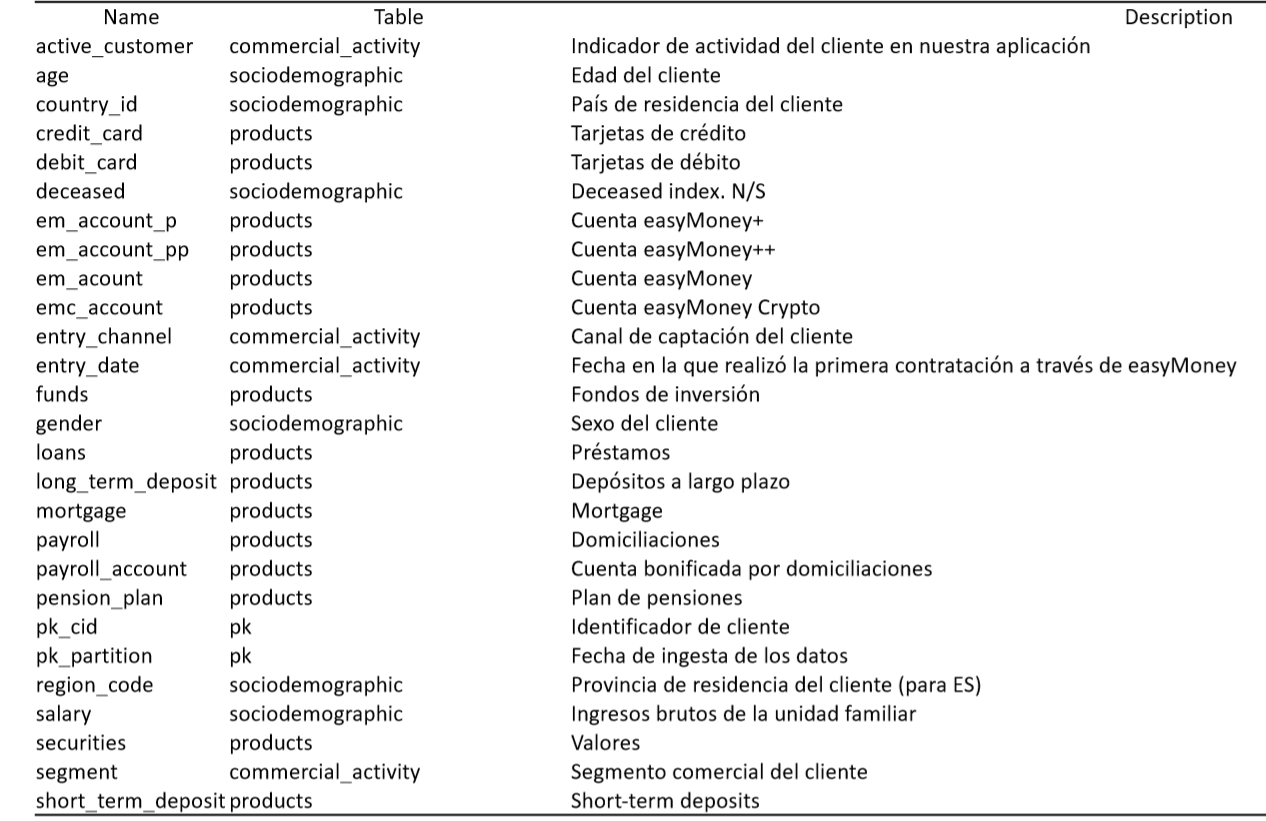

## **Librerias para el Análisis**

In [ ]:
#!pip install cufflinks --upgrade

In [1]:
import numpy as np 
import pandas as pd

# Visualización 
# import cufflinks as cf
import plotly.offline as py
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
pd.options.display.float_format = '{:,.2f}'.format

# **1. Productos**


*   **pk_cid.**          Identificador de cliente
*   **pk_partition.**      Fecha de ingesta de los datos
*   **credit_card**.        Tarjetas de crédito
*   **debit_card.**         Tarjetas de débito lista
*   **em_account_p.**       Cuenta easyMoney+
*   **em_account_pp.**      Cuenta easyMoney++
*   **em_acount.**         Cuenta easyMoney
*   **emc_account.**        Cuenta easyMoney Crypto
*   **funds.**             Fondos de inversión
*   **loans**.              Préstamos
*   **long_term_deposit.**  Depósitos a largo plazo
*   **mortgage.**           Mortgage (Hipotecas)
*  **payroll.**           Domiciliaciones
*  **payroll_account.**    Cuenta bonificada por domiciliaciones
*   **pension_plan.**      Plan de pensiones
*   **securities.**         Valores
*   **short_term_deposit.** Short-term deposits (inversión corto plazo)





## Lectura de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ruta = "/content/drive/MyDrive/clases Data/TFM/"

In [ ]:
#ruta = "/content/drive/MyDrive/clases Data/TFM/"
products = pd.read_csv(ruta+'products_df.csv')
del(products['Unnamed: 0'])

## Revisión General

In [ ]:
# Observamos la estructura del dataframe
products

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962919,1166765,2019-05-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
5962920,1166764,2019-05-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
5962921,1166763,2019-05-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
5962922,1166789,2019-05-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1


In [ ]:
# Veamos todas las columnas dentro de una lista para comprobar que sean los mismos productos y variables
products.columns.to_list()

['pk_cid',
 'pk_partition',
 'short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'em_account_pp',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount']

In [ ]:
# Observamos que el índice es independiente y único (creado por python). Posteriormente iremos iterandolo para sacar la info que queremos.
products.index.values


array([      0,       1,       2, ..., 5962921, 5962922, 5962923])

In [ ]:
# Vemos de que tipo es la data que tenemos. De momento podemos identificar que devemos cambiar la partición a fecha y el ID del cliente a objeto para poder manipularlos mejor.
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   short_term_deposit  int64  
 3   loans               int64  
 4   mortgage            int64  
 5   funds               int64  
 6   securities          int64  
 7   long_term_deposit   int64  
 8   em_account_pp       int64  
 9   credit_card         int64  
 10  payroll             float64
 11  pension_plan        float64
 12  payroll_account     int64  
 13  emc_account         int64  
 14  debit_card          int64  
 15  em_account_p        int64  
 16  em_acount           int64  
dtypes: float64(2), int64(14), object(1)
memory usage: 773.4+ MB


In [ ]:
# Transformamos los datos de pk_partition a tipo fecha y el de pk_cid a string
products["pk_partition"] = pd.to_datetime(products["pk_partition"],format="%Y-%m-%d")
products["pk_cid"] = products.pk_cid.apply(str)

In [ ]:
# Comprobamos que los cambios se han hecho de manera correcta.
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              object        
 1   pk_partition        datetime64[ns]
 2   short_term_deposit  int64         
 3   loans               int64         
 4   mortgage            int64         
 5   funds               int64         
 6   securities          int64         
 7   long_term_deposit   int64         
 8   em_account_pp       int64         
 9   credit_card         int64         
 10  payroll             float64       
 11  pension_plan        float64       
 12  payroll_account     int64         
 13  emc_account         int64         
 14  debit_card          int64         
 15  em_account_p        int64         
 16  em_acount           int64         
dtypes: datetime64[ns](1), float64(2), int64(13), object(1)
memory usage: 773.4+ MB


In [ ]:
# Observamos la descripción de cada una de las columnas del dataset
products.describe().T

,count,mean,std,min,25%,50%,75%,max
short_term_deposit,"5,962,924.00",0.00,0.05,0.00,0.00,0.00,0.00,1.00
loans,"5,962,924.00",0.00,0.01,0.00,0.00,0.00,0.00,1.00
mortgage,"5,962,924.00",0.00,0.01,0.00,0.00,0.00,0.00,1.00
funds,"5,962,924.00",0.00,0.06,0.00,0.00,0.00,0.00,1.00
securities,"5,962,924.00",0.00,0.06,0.00,0.00,0.00,0.00,1.00
long_term_deposit,"5,962,924.00",0.02,0.13,0.00,0.00,0.00,0.00,1.00
em_account_pp,"5,962,924.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
credit_card,"5,962,924.00",0.01,0.11,0.00,0.00,0.00,0.00,1.00
payroll,"5,962,863.00",0.03,0.18,0.00,0.00,0.00,0.00,1.00
pension_plan,"5,962,863.00",0.04,0.19,0.00,0.00,0.00,0.00,1.00


Con este pequeño análisis, podemos deducir varias cosas:

- Sabemos que es un dataset binario, de "0" y "1", en los que el "1" es que un cliente ha contratado un servicio durante un periodo dterminado (1 mes) y el "0" que no lo ha contratado.
- Tenemos 5,962,924 entradas en el sistema. Las cuales hay que análisar mas detenidamente mas adelante.
- Vemos que hay un producto que destaca entre los demás, y es que de media el 73% de nuestrsos clientes lo han contratado a los largo de  todas las particiones (em_account).

## Revisión de Nulos (nan)

In [ ]:
# Comprobamos en que columnas hay NA
products.isnull().any()

pk_cid                False
pk_partition          False
short_term_deposit    False
loans                 False
mortgage              False
funds                 False
securities            False
long_term_deposit     False
em_account_pp         False
credit_card           False
payroll                True
pension_plan           True
payroll_account       False
emc_account           False
debit_card            False
em_account_p          False
em_acount             False
dtype: bool

In [ ]:
# Ejecutamos una pequeña función para análizar de manera rápida donde están los NA en comparación a la contabilización de sus valores por columna.
for i in products.columns:
    x = products[i].value_counts(dropna=False)
    print("Column name is:",i,"and its value is:",x)

Column name is: pk_cid and its value is: 1075980    17
1099452    17
1179076    17
1202764    17
1304638    17
           ..
1540520     1
1531767     1
1404186     1
1552594     1
1552242     1
Name: pk_cid, Length: 456373, dtype: int64
Column name is: pk_partition and its value is: 2019-05-28    442995
2019-04-28    439627
2019-03-28    436183
2019-02-28    431727
2019-01-28    426875
2018-12-28    422481
2018-11-28    416387
2018-10-28    402300
2018-09-28    375323
2018-08-28    352922
2018-07-28    339339
2018-06-28    252104
2018-05-28    249926
2018-04-28    247463
2018-03-28    245258
2018-02-28    242521
2018-01-28    239493
Name: pk_partition, dtype: int64
Column name is: short_term_deposit and its value is: 0    5947530
1      15394
Name: short_term_deposit, dtype: int64
Column name is: loans and its value is: 0    5962456
1        468
Name: loans, dtype: int64
Column name is: mortgage and its value is: 0    5962600
1        324
Name: mortgage, dtype: int64
Column name is: f

In [ ]:
# Comprobamos que el porcentaje de N/A es muy pequeño
navalues = products[products['payroll'].isna()].shape[0]
percentage_of_na = 100*navalues / products.shape[0]
percentage_of_na

0.0010229880508287545

In [ ]:
# Seleccionamos los casos de payroll na
payroll_na = products[products['payroll'].isna()]
# Comprobamos que son exactamente los mismos que para pension plan
payroll_na['pension_plan'].value_counts(dropna=False)

nan    61
Name: pension_plan, dtype: int64

In [ ]:
# Observamos que los na solo aparecen en los 5 primeros meses
payroll_na['pk_partition'].value_counts()

2018-01-28    17
2018-02-28    14
2018-03-28    10
2018-04-28    10
2018-05-28    10
Name: pk_partition, dtype: int64

In [ ]:
# Como son pocos transformamos los na en 0, lo que significa, que es como si nunca hubieran contratado el producto.
products["payroll"].fillna(0,inplace=True)
products["pension_plan"].fillna(0,inplace=True)

In [ ]:
# Comprobamos que ya no hay na
products.isnull().any()

pk_cid                False
pk_partition          False
short_term_deposit    False
loans                 False
mortgage              False
funds                 False
securities            False
long_term_deposit     False
em_account_pp         False
credit_card           False
payroll               False
pension_plan          False
payroll_account       False
emc_account           False
debit_card            False
em_account_p          False
em_acount             False
dtype: bool

# Creación de nuevas variables & Análisis experimental

Se nos ha ocurrido que de la columna "pk_partition" que está en formato fecha, podemos extraer tanto el año como el mes para poder crear periodos, que nos permitan comparar la evolución de los clientes y de los productos contratados. Podremos ver si un cliente a dejado de contratar un servicio o si ha contratado alguno nuevo. Desarrollemos la idea.

## Año, Mes, Periodo y Total de productos contratados

In [ ]:
# Pasamos las particiones a string para poder seleccionar luego el año y el mes, la idea es 
products['pk_partition'] = products['pk_partition'].astype(str)
# Como payroll y pension plan son binarios los pasamos a int
products['payroll']=products['payroll'].astype(int)
products['pension_plan']=products['pension_plan'].astype(int)

In [ ]:
# Creamos las variables mes y año a partir de pk_partition
products['Year']= products['pk_partition'].str[0:4]
products['Month']= products['pk_partition'].str[5:7]
products['Month']=products['Month'].astype(int)
products['Year']=products['Year'].astype(int)

In [ ]:
# Generamos periodo
products['Period']=products['Month']+((products['Year']-2018)*12)

In [ ]:
# Vemos la forma del nuevo dataframe
products

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,Year,Month,Period
0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2018,1,1
1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2018,1,1
2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2018,1,1
3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018,1,1
4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2018,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962919,1166765,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2019,5,17
5962920,1166764,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2019,5,17
5962921,1166763,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2019,5,17
5962922,1166789,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2019,5,17


In [ ]:
# Iniciamos el cálculo del total de productos
# Seleccionamos todas las columnas de productos, todas excepto las dos primeras que corresponden al cliente y a la partición, ni las tres últimas que corresponden al mes, al año y al periodo.
column_names = list(products.columns)
column_names = column_names[2:-3]
column_names

['short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'em_account_pp',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount']

In [ ]:
# Hacemos el sumatorio para tener el total de productos por línea
products['Total_productos'] = products[column_names].sum(axis=1)

In [ ]:
# Observamos que hay muchas líneas con 0 productos
products['Total_productos'].value_counts()

1    3995714
0    1121507
2     528593
3     150269
4     105720
5      42890
6      14809
7       2799
8        573
9         50
Name: Total_productos, dtype: int64

In [ ]:
# Calculamos el porcentaje de líneas sin productos
total_0 = products[products['Total_productos']==0].shape[0]
percentage_0 = 100*total_0 / products.shape[0]
percentage_0

18.808004260996785

Existe un porcentaje bastante alto de clientes que no tienen contratado ningún servicio durante ninguno de los 17 periodos. Aun no sabemos si coinciden con el mismo porcentaje de clientes activos e inactivos. Mas adelante podemos hacer la comparativa cuando juntemos la información. De momento algo interesante sería enfocar alguna camapaña a estos clientes que no tienen ningún producto contratado.

## Variación de productos totales contratados entre meses consecutivos

In [ ]:
# Vamos a calcular las variaciones de productos totales entre meses consecutivos
# Seleccionamos las columnas que queremos ver del mes previo
for_previous=["Total_productos"]
# Seleccionamos los índices por los que vamos a clasificar ('id','periodo')
indexers=["pk_cid",  
          "Period"]

In [ ]:
# Colocamos los índices que nos interesan
products.set_index(indexers, inplace=True)
products.sort_index(inplace=True)

In [ ]:
# Creamos una copia del dataframe pero conservando solo las columnas de Total de productos
product_prev=products[for_previous].copy()

In [ ]:
product_prev.head(17) #veamos que pinta tiene hasta ahora.

Total_productos
pk_cid  Period                 
1000028 1                     2
        2                     2
        3                     2
        4                     2
        5                     2
        6                     2
        7                     1
        8                     2
        9                     2
        10                    2
        11                    2
        12                    2
        13                    2
        14                    2
        15                    2
        16                    2
        17                    2

In [ ]:
# Recorremos los índices y añadimos uno al período
product_prev.index=product_prev.index.map(lambda x: (x[0], x[1]+1))

In [ ]:
product_prev.head(17)

Total_productos
pk_cid  Period                 
1000028 2                     2
        3                     2
        4                     2
        5                     2
        6                     2
        7                     2
        8                     1
        9                     2
        10                    2
        11                    2
        12                    2
        13                    2
        14                    2
        15                    2
        16                    2
        17                    2
        18                    2

In [ ]:
# Unimos los dos dataframes para obtener así tanto el total como el del mes anterior juntos
df=products.join(product_prev,rsuffix="_mes_anterior")

In [ ]:
# Reiniciamos los índices
df = df.reset_index()

In [ ]:
df.head(17)

,pk_cid,Period,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,Year,Month,Total_productos,Total_productos_mes_anterior
0,1000028,1,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,1,2,nan
1,1000028,2,2018-02-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,2,2,2.00
2,1000028,3,2018-03-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,3,2,2.00
3,1000028,4,2018-04-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,4,2,2.00
4,1000028,5,2018-05-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,5,2,2.00
5,1000028,6,2018-06-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,6,2,2.00
6,1000028,7,2018-07-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2018,7,1,2.00
7,1000028,8,2018-08-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,8,2,1.00
8,1000028,9,2018-09-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,9,2,2.00
9,1000028,10,2018-10-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,10,2,2.00


In [ ]:
# Observamos que hay NA en todos aquellos casos en los que el cliente no estuviese registrado en el mes anterior, lo registramos como 0, exceptuando el primer periodo, ya que no existen datos previos
df.loc[df.Period>1,'Total_productos_mes_anterior'] = df.loc[df.Period>1,'Total_productos_mes_anterior'].fillna(0)

In [ ]:
# Calculamos la diferencia entre los meses actuales y los anteriores para ver que clientes se han dado de alta en productos y cuales de baja
df['Diference'] = df['Total_productos']-df['Total_productos_mes_anterior']

In [ ]:
df.head(17)

,pk_cid,Period,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,Year,Month,Total_productos,Total_productos_mes_anterior,Diference
0,1000028,1,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,1,2,nan,nan
1,1000028,2,2018-02-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,2,2,2.00,0.00
2,1000028,3,2018-03-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,3,2,2.00,0.00
3,1000028,4,2018-04-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,4,2,2.00,0.00
4,1000028,5,2018-05-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,5,2,2.00,0.00
5,1000028,6,2018-06-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,6,2,2.00,0.00
6,1000028,7,2018-07-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2018,7,1,2.00,-1.00
7,1000028,8,2018-08-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,8,2,1.00,1.00
8,1000028,9,2018-09-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,9,2,2.00,0.00
9,1000028,10,2018-10-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,10,2,2.00,0.00


In [ ]:
# Observamos los valores para la diferencia... OJO IMPORTANTE, extender la explicación.
df_barplot = df.groupby("Period").sum()
df_barplot

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,Year,Month,Total_productos,Total_productos_mes_anterior,Diference
Period,,,,,,,,,,,,,,,,,,,,
1,883,19,15,786,932,4884,0,3325,8145,8835,13478,15320,24696,2,215293,483296874,239493,296613,0.00,0.00
2,1343,19,15,872,965,4956,0,3282,8889,9496,14246,15827,25448,2,217098,489407378,485042,302458,"296,560.00","5,898.00"
3,1664,23,17,969,965,4965,0,3511,9735,9882,14989,16428,27046,2,218683,494930644,735774,308879,"302,397.00","6,482.00"
4,1740,24,17,1084,983,5107,0,3725,9905,10560,15825,16947,27764,2,219816,499380334,989852,313499,"308,742.00","4,757.00"
5,1455,27,18,1145,1012,5356,0,3797,9994,10148,16697,17569,27911,2,221291,504350668,1249630,316422,"313,448.00","2,974.00"
6,1244,27,19,1159,1019,5588,0,4002,10946,11635,15540,17950,28828,2,224328,508745872,1512624,322287,"316,253.00","6,034.00"
7,1282,28,20,1172,1053,5796,0,4137,11888,12779,16916,18185,29578,2,234324,684786102,2375373,337160,"322,287.00","14,873.00"
8,1335,29,20,1219,1133,5923,0,4206,11383,12126,18118,18333,29205,2,245980,712196596,2823376,349012,"337,118.00","11,894.00"
9,1386,31,20,1237,1201,6158,0,4289,11850,12624,18862,18618,31684,2,261210,757401814,3377907,369172,"348,978.00","20,194.00"


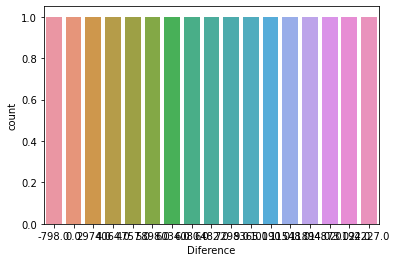

In [ ]:
sns.countplot(data=df_barplot, x='Diference')

In [ ]:
products_final = df

## Análisis por columnas

 A continuación haremos un análisis por columnas identificando las 3 variables que podemos encontrar dentro del dataset: 1. Productos, 2. Particiones, 3. Clientes.

### Análisis por periodo (Period)

In [ ]:
# Veamos primero cuantos productos contratados tenemos por partición (periodo de 1 mes, del 28 al 28)
df_chart = products_final['pk_partition'].value_counts().rename_axis("pk_partition").reset_index(name="values")

Text(0.5, 0, 'Customers')

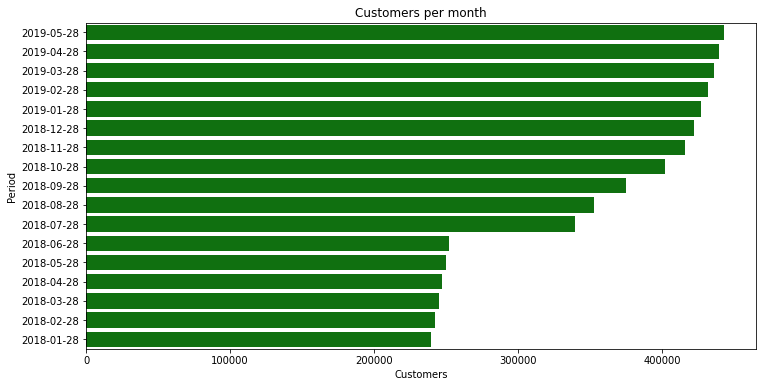

In [ ]:
# Representamos en un gráfico de barras la cantidad de clientes por mes
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(data=df_chart, y="pk_partition", x="values", color="green", ax=ax)

ax.set_title("Customers per month")
ax.set_ylabel("Period")
ax.set_xlabel("Customers")

In [ ]:
#A continuación agruparemos los datos por partición y haremos la suma de los productos contratados por separado, así podrémos identificar cuales son los productos mas contratados por mes.
products_total = products_final.groupby('pk_partition').sum()
products_total = products_total.drop(['Period','Year','Month','Total_productos','Total_productos_mes_anterior','Diference'], axis=1)
products_total

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
pk_partition,,,,,,,,,,,,,,,
2018-01-28,883,19,15,786,932,4884,0,3325,8145,8835,13478,15320,24696,2,215293
2018-02-28,1343,19,15,872,965,4956,0,3282,8889,9496,14246,15827,25448,2,217098
2018-03-28,1664,23,17,969,965,4965,0,3511,9735,9882,14989,16428,27046,2,218683
2018-04-28,1740,24,17,1084,983,5107,0,3725,9905,10560,15825,16947,27764,2,219816
2018-05-28,1455,27,18,1145,1012,5356,0,3797,9994,10148,16697,17569,27911,2,221291
2018-06-28,1244,27,19,1159,1019,5588,0,4002,10946,11635,15540,17950,28828,2,224328
2018-07-28,1282,28,20,1172,1053,5796,0,4137,11888,12779,16916,18185,29578,2,234324
2018-08-28,1335,29,20,1219,1133,5923,0,4206,11383,12126,18118,18333,29205,2,245980
2018-09-28,1386,31,20,1237,1201,6158,0,4289,11850,12624,18862,18618,31684,2,261210


Hay 2 productos que claramente no tienen incidencia sobre nuestra base de datos. Tanto "em_account_pp" como "em_account_p". Una tiene 0 la otra 2 productos contratados en todos los periodos. (de momento no las eliminarmos, pero puede que sea un error de dedo al introducir los datos. 

In [ ]:
# Visualización de los productos contratados por mes
py.iplot([{
    "x":products_total.index,
    "y": products_total[col],
    "name": col
}   for col in products_total.columns], filename= "cufflinks/multiple-lines-on-same-chart")
#La gráfica es interactiva, podemos hacer un "zoom" para ver con más claridad las escalas.

### Análisis por Cliente (pk_cid)

In [ ]:
# De momento sabemos que existen 456373 clientes únicos en la base de datos en los 17 periodos.
products_final["pk_cid"].nunique()

456373

In [ ]:
product_columns = list(products_final.columns)
product_columns = product_columns[:-5]
product_columns

['pk_cid',
 'Period',
 'pk_partition',
 'short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'em_account_pp',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount']

In [ ]:
# Observamos los valores únicos por columna agrupando por cliente.
unique_values = products_final[product_columns].groupby("pk_cid").nunique()
unique_values

,Period,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
pk_cid,,,,,,,,,,,,,,,,,
1000028,17,17,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
1000096,17,17,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1000105,9,9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1000113,14,14,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2
1000130,11,11,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998859,17,17,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1
999706,6,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
999825,17,17,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Si agrupamos los datos por cliente, podemos ver que un mismo cliente puede que no aparezca en todos los períodos, por lo que una vez dado de alta no significa que prevalesca como "activo". Otra dato interesante, es que puede que un mismo cliente haya contratado mas de una vez el mismo producto. Entendemos que es así por que lo contrata, se da de baja y después lo vuelve a contratar.

In [ ]:
#Hemos comprobado que no hay clientes repetidos en un mismo mes, utilizando todos los "pk_partitions". Aqui dejamos uno solo como ejemplo. El número coincide con el .value_counts por particion.
products_final[products_final['pk_partition'] == '2019-05-28']['pk_cid'].nunique() 

442995

In [ ]:
#Comprobamos  que el ID del cliente, solo aparece una vez por periodo.
products_final['pk_cid'][products_final['pk_partition'] == "2019-05-28"].value_counts().sample(20)

1039957    1
1160036    1
1394804    1
1132842    1
1135838    1
1465583    1
1433346    1
1389615    1
1384800    1
1381980    1
1457517    1
1301751    1
1048852    1
1180372    1
1289472    1
1499982    1
1367107    1
1038866    1
1227647    1
1277159    1
Name: pk_cid, dtype: int64

In [ ]:
#También hemos comprobado con algunos samples, que hay muchos clientes que no tienen contratado ni un solo producto, pero aun así aparecen en la base de datos.
products_final[products_final["pk_cid"] == "999706"]

,pk_cid,Period,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,Year,Month,Total_productos,Total_productos_mes_anterior,Diference
5962867,999706,12,2018-12-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018,12,0,0.00,0.00
5962868,999706,13,2019-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,1,0,0.00,0.00
5962869,999706,14,2019-02-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,2,0,0.00,0.00
5962870,999706,15,2019-03-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,3,0,0.00,0.00
5962871,999706,16,2019-04-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,4,0,0.00,0.00
5962872,999706,17,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,5,0,0.00,0.00


In [ ]:
products_final

,pk_cid,Period,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,Year,Month,Total_productos,Total_productos_mes_anterior,Diference
0,1000028,1,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,1,2,nan,nan
1,1000028,2,2018-02-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,2,2,2.00,0.00
2,1000028,3,2018-03-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,3,2,2.00,0.00
3,1000028,4,2018-04-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,4,2,2.00,0.00
4,1000028,5,2018-05-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,5,2,2.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962919,999892,13,2019-01-28,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,2019,1,4,4.00,0.00
5962920,999892,14,2019-02-28,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,2019,2,4,4.00,0.00
5962921,999892,15,2019-03-28,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,2019,3,4,4.00,0.00
5962922,999892,16,2019-04-28,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,2019,4,4,4.00,0.00


In [ ]:
## We save the products_final df to avoid memory issues
products_final.to_csv('products_final.csv')


# **2. Sociodemográfica**


*   **pk_cid.** Identificador de cliente
*   **pk_partition.** Fecha de ingesta de los datos
*   **age.** Edad del cliente
*   **country_id.** País de residencia del cliente
*   **deceased.** Deceased index. N/S
*   **gender.** Sexo del cliente
*   **region_code.** Provincia de residencia del cliente (para ES)
*   **salary.** Ingresos brutos de la unidad familiar


## Lectura de datos

In [5]:
sociodemographic = pd.read_csv(ruta+'sociodemographic_df.csv')
del(sociodemographic['Unnamed: 0'])

## Revisión General

In [ ]:
# Observamos la estructura del dataframe
sociodemographic

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-28,ES,29.00,H,35,N,"87,218.10"
1,1050611,2018-01-28,ES,13.00,V,23,N,"35,548.74"
2,1050612,2018-01-28,ES,13.00,V,23,N,"122,179.11"
3,1050613,2018-01-28,ES,50.00,H,22,N,"119,775.54"
4,1050614,2018-01-28,ES,50.00,V,23,N,nan
...,...,...,...,...,...,...,...,...
5962919,1166765,2019-05-28,ES,50.00,V,22,N,"43,912.17"
5962920,1166764,2019-05-28,ES,26.00,V,23,N,"23,334.99"
5962921,1166763,2019-05-28,ES,50.00,H,47,N,nan
5962922,1166789,2019-05-28,ES,50.00,H,22,N,"199,592.82"


In [ ]:
# Observamos el tipo de datos del dataframe
sociodemographic.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pk_cid        int64  
 1   pk_partition  object 
 2   country_id    object 
 3   region_code   float64
 4   gender        object 
 5   age           int64  
 6   deceased      object 
 7   salary        float64
dtypes: float64(2), int64(2), object(4)
memory usage: 363.9+ MB


In [ ]:
# Vemos el número de filas y columnas del dataframe
sociodemographic.shape

(5962924, 8)

Observamos que tiene la misma cantidad de entradas que nuestro dataset anterior. Esto nos puede permitir (en caso de ser necesario) juntar ambos datasets para traer alguna variables que nos ayude con nuestro modelo de ML.

In [ ]:
# Descripción de las variables del dataframe
sociodemographic.describe()

,pk_cid,region_code,age,salary
count,"5,962,924.00","5,960,660.00","5,962,924.00","4,450,821.00"
mean,"1,234,929.80",25.81,29.76,"115,816.72"
std,"162,302.04",13.60,11.98,"199,551.89"
min,"15,891.00",1.00,2.00,"1,202.73"
25%,"1,112,532.00",13.00,22.00,"61,500.63"
50%,"1,231,097.00",28.00,25.00,"88,654.65"
75%,"1,352,339.00",36.00,34.00,"131,669.91"
max,"1,553,689.00",52.00,105.00,"28,894,395.51"


Creemos que hay bastante sesgos e irregularidades en esta información. Primero que nada no debería haber gente menor de 18 años (a menos que tengan cuentas para más jóvenes, algo que desconocemos). Por otro lado las cantidades en los sueldos tampoco son razonables. Creo que el sesgo está creado por que no se especifica si al salario es bruto o neto anual, mensual, etc... Creemos que no es una variable que vayamos a tomar en cuenta en nuestro modelo de ML por la falta de coherencia que nos aporta.

## Revisión de nulos

In [ ]:
# Vemos si existen nulos en alguna columna
sociodemographic.isnull().any()

pk_cid          False
pk_partition    False
country_id      False
region_code      True
gender           True
age             False
deceased        False
salary           True
dtype: bool

In [ ]:
# Contamos cuántos nulos hay
sociodemographic.isna().sum()

pk_cid                0
pk_partition          0
country_id            0
region_code        2264
gender               25
age                   0
deceased              0
salary          1512103
dtype: int64

In [ ]:
# Contamos el porcentaje de nulos
sociodemographic.isnull().mean()*100

pk_cid          0.00
pk_partition    0.00
country_id      0.00
region_code     0.04
gender          0.00
age             0.00
deceased        0.00
salary         25.36
dtype: float64

La unica parte en la que hemos encontrado un número significativo de Nulos es en la parte del salario. Hemos decidido que mas de un 25% es mucho como para incluir esa variable en alguno de nuestros modelos. También hemos decidido no hacer ningún otro modelo de predicción, ni reemplazar esos nulos con la media de todos los sueldos, ya que hemos detectado muchos casos en los que un cliente con poco sueldo tiene contratados muchos productos. Creemos que es algo que afectaría al modelo.

## Análisis por columnas

Haremos una breve descripción de todas las columnas. Pero en la que más nos enfocaremos para nuestro análisis es en el pais. Creemos que gran parte de nuestra estrategia de marketing y comercial, puede estar relacionada con esta variable.

### Análisis por País (country_id)

In [ ]:
# Hacemos una cuenta de valores por país
total_countries = sociodemographic.country_id.value_counts(dropna=False)
total_countries

ES    5960672
GB        441
FR        225
DE        199
US        195
CH        194
BR         87
BE         81
VE         79
IE         68
MX         58
AR         51
AT         51
PL         49
IT         45
MA         34
CL         30
CN         28
CA         22
DO         17
ET         17
GA         17
MR         17
SA         17
CI         17
NO         17
LU         17
CO         17
SN         17
RU         17
GT         17
CM         17
QA         17
SE         16
PT         11
JM         11
DJ         11
RO          9
HU          8
DZ          7
PE          4
Name: country_id, dtype: int64

In [ ]:
# Tenemos clientes en 41 paises diferentes.
sociodemographic.country_id.nunique()

41

In [ ]:
#Como ya sabemos, no todos los clientes se encuentran en España. Observamos los clientes situados en España, que son casi el 100%.
customers_ES = sociodemographic[sociodemographic['country_id']=='ES'].shape[0]
percentage_ES = 100*customers_ES / sociodemographic.shape[0]
percentage_ES

99.96223329359891

### Análisis por Género (gender), Salario y Decesos

In [ ]:
# Vemos cuántas instancias tenemos de cada género
sociodemographic.gender.value_counts() 

H    3087502
V    2875397
Name: gender, dtype: int64

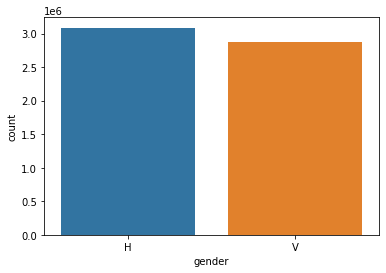

In [ ]:
sns.countplot(data=sociodemographic, x='gender')

In [ ]:
# En porcentaje. Hay aproximadamente un 52% de clientes mujeres.
customers_H = sociodemographic[sociodemographic['gender']=='H'].shape[0]
percentage_H = 100*customers_H / sociodemographic.shape[0]
percentage_H

51.77832217885051

In [ ]:
# Vamos a analizar la variable del salario
sociodemographic.salary.value_counts(dropna=False) 


nan           1512103
451,931.22        760
288,997.44        546
135,522.15        466
128,318.52        458
               ...   
192,297.42          1
55,041.57           1
150,955.83          1
51,838.86           1
73,880.40           1
Name: salary, Length: 258630, dtype: int64

In [ ]:
# Tenemos muchos nulos como para tomar en cuenta esta variable. Porcentualmente un 25%.
customers_NA_salary = sociodemographic[sociodemographic.salary.isna()].shape[0]
percentage_NA_salary = 100*customers_NA_salary / sociodemographic.shape[0]
percentage_NA_salary

25.3584147643002

In [ ]:
# Análisis para los decesos. La gran mayoría no se encuentran en esta clasificación.
sociodemographic.deceased.value_counts()

N    5961849
S       1075
Name: deceased, dtype: int64

In [ ]:
# que hacemos con las edades, también es algo importante a la hora de segmentar a los clientes. Cuanod hagamos el Join, habrá que detectar cual es el grupo de edad que más servicios tiene contratados.

# **3. Actividad Comercial**

*   **pk_cid.** Identificador de cliente
*   **pk_partition.** Fecha de ingesta de los datos
*   **active_customer.** Indicador actividad del cliente en nuestra APP 
*   **entry_channel.** Canal de captación del cliente
*   **entry_date.** Fecha primera contratación a través de easyMoney
*   **segment.** Segmento comercial del cliente



## Lectura de datos

In [6]:
commercial = pd.read_csv(ruta+'commercial_activity_df.csv')
del(commercial['Unnamed: 0'])

## Revisión General

In [ ]:
#Tenemos 1792 datos creados con fecha errada 2015-02-29 y 4621 datos con fecha 2019-02-29, días que no existen
commercial[commercial['entry_date'] == '2015-02-29']

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
78753,1006949,2018-01-28,2015-02-29,KHC,1.00,02 - PARTICULARES
78768,1006947,2018-01-28,2015-02-29,KAT,0.00,02 - PARTICULARES
78770,1006946,2018-01-28,2015-02-29,KAT,0.00,02 - PARTICULARES
78771,1006939,2018-01-28,2015-02-29,KHD,0.00,03 - UNIVERSITARIO
78772,1006898,2018-01-28,2015-02-29,KFC,1.00,02 - PARTICULARES
...,...,...,...,...,...,...
5839112,1006927,2019-05-28,2015-02-29,KFC,0.00,02 - PARTICULARES
5839113,1006925,2019-05-28,2015-02-29,KFC,1.00,02 - PARTICULARES
5839114,1006924,2019-05-28,2015-02-29,KFC,1.00,02 - PARTICULARES
5839115,1006923,2019-05-28,2015-02-29,KFC,1.00,02 - PARTICULARES


In [7]:
# Reemplazamos las fechas incorrectas que se crearon para febrero 29 por febrero 28
commercial['entry_date'] = commercial['entry_date'].replace('-02-29','-02-28', regex=True) 

In [ ]:
# Observamos el tipo de datos del dataframe
commercial.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pk_cid           int64  
 1   pk_partition     object 
 2   entry_date       object 
 3   entry_channel    object 
 4   active_customer  float64
 5   segment          object 
dtypes: float64(1), int64(1), object(4)
memory usage: 273.0+ MB


In [ ]:
# Observamos el dataframe
commercial

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,2018-01-12,KHL,1.00,02 - PARTICULARES
1,1050611,2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
2,1050612,2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
3,1050613,2018-01-28,2015-08-10,KHD,0.00,03 - UNIVERSITARIO
4,1050614,2018-01-28,2015-08-10,KHE,1.00,03 - UNIVERSITARIO
...,...,...,...,...,...,...
5962919,1166765,2019-05-28,2016-08-14,KHE,0.00,03 - UNIVERSITARIO
5962920,1166764,2019-05-28,2016-08-14,KHE,0.00,03 - UNIVERSITARIO
5962921,1166763,2019-05-28,2016-08-14,KHE,1.00,02 - PARTICULARES
5962922,1166789,2019-05-28,2016-08-14,KHE,0.00,03 - UNIVERSITARIO


In [ ]:
# Describimos las variables del dataframe
commercial.describe()

,pk_cid,active_customer
count,"5,962,924.00","5,962,924.00"
mean,"1,234,929.80",0.40
std,"162,302.04",0.49
min,"15,891.00",0.00
25%,"1,112,532.00",0.00
50%,"1,231,097.00",0.00
75%,"1,352,339.00",1.00
max,"1,553,689.00",1.00


Nuevamente nos encontramos con que el dataset tiene el mismo número de entradas (filas) que los 2 anteriores, por lo que si es necesario juntar la info lo podemos hacer de manera sencilla. A destacar en esta info, que el cliente activo tiene un 1 y el inactivo un 0. No sabemos dentro de la empresa a que se le concideren ambos casos, no sabemos a partir de periodo de tiempo se convierta en churn. Nos adentraremos en este punto mas adelante cuando comparemos las columnas de las 3 bases de datos.

## Revisión de Nulos

In [ ]:
# Vemos si existen nulos
commercial.isnull().any()

pk_cid             False
pk_partition       False
entry_date         False
entry_channel       True
active_customer    False
segment             True
dtype: bool

In [ ]:
# Vemos cuántos nulos existen
commercial.isna().sum()

pk_cid                  0
pk_partition            0
entry_date              0
entry_channel      133033
active_customer         0
segment            133944
dtype: int64

In [ ]:
# La cantidad de nulos porcentualmente
commercial.isnull().mean()*100

pk_cid            0.00
pk_partition      0.00
entry_date        0.00
entry_channel     2.23
active_customer   0.00
segment           2.25
dtype: float64

In [ ]:
# Consideramos que no son porcentajes muy alto de NA, aunque también hemos decidido no meterlos en nuestro modelo de clasificación.

## Análisis por columnas

In [ ]:
# Contamos valores por fecha de entrada
commercial.entry_date.value_counts(dropna=False)

2017-07-28    57389
2017-10-03    54287
2017-08-04    45746
2016-10-14    40804
2016-08-03    33414
              ...  
2017-03-30       11
2016-09-07       11
2015-08-19       11
2018-05-31        9
2017-05-01        7
Name: entry_date, Length: 1497, dtype: int64

In [ ]:
# Contamos valores por canal de entrada
commercial.entry_channel.value_counts(dropna=False)

KHE    3113947
KFC     890620
KHQ     590280
KAT     416084
KHK     230197
        ...   
KEJ          8
KHS          5
KDA          2
KFP          2
KDS          1
Name: entry_channel, Length: 69, dtype: int64

In [ ]:
# Contamos valores en función de si está activo o no
commercial.active_customer.value_counts(dropna=False)

0.00    3557573
1.00    2405351
Name: active_customer, dtype: int64

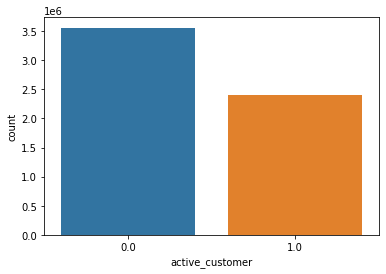

In [ ]:
sns.countplot(data=commercial, x='active_customer')

In [ ]:
# En porcentaje, hay más de un 59% de clientes inactivos. Será interesante enfocar la estrategia de crecimiento en la penetración de este mercado existente.
3557573*100/5962924

59.66155195001647

In [ ]:
# Contamos valores por segmento
commercial.segment.value_counts(dropna=False)

03 - UNIVERSITARIO    3900166
02 - PARTICULARES     1830875
NaN                    133944
01 - TOP                97939
Name: segment, dtype: int64

# **4. Join - Creación de dataframe final para modelo de ML**

In [4]:
# Comprobamos que los datasets sigan como los originales
products_final = pd.read_csv('products_final.csv')
products_final

,Unnamed: 0,pk_cid,Period,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,Year,Month,Total_productos,Total_productos_mes_anterior,Diference
0,0,1000028,1,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,1,2,nan,nan
1,1,1000028,2,2018-02-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,2,2,2.00,0.00
2,2,1000028,3,2018-03-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,3,2,2.00,0.00
3,3,1000028,4,2018-04-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,4,2,2.00,0.00
4,4,1000028,5,2018-05-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,5,2,2.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962919,5962919,999892,13,2019-01-28,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,2019,1,4,4.00,0.00
5962920,5962920,999892,14,2019-02-28,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,2019,2,4,4.00,0.00
5962921,5962921,999892,15,2019-03-28,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,2019,3,4,4.00,0.00
5962922,5962922,999892,16,2019-04-28,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,2019,4,4,4.00,0.00


In [ ]:
# Comprobamos que los datasets sigan como los originales
sociodemographic

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-28,ES,29.00,H,35,N,"87,218.10"
1,1050611,2018-01-28,ES,13.00,V,23,N,"35,548.74"
2,1050612,2018-01-28,ES,13.00,V,23,N,"122,179.11"
3,1050613,2018-01-28,ES,50.00,H,22,N,"119,775.54"
4,1050614,2018-01-28,ES,50.00,V,23,N,nan
...,...,...,...,...,...,...,...,...
5962919,1166765,2019-05-28,ES,50.00,V,22,N,"43,912.17"
5962920,1166764,2019-05-28,ES,26.00,V,23,N,"23,334.99"
5962921,1166763,2019-05-28,ES,50.00,H,47,N,nan
5962922,1166789,2019-05-28,ES,50.00,H,22,N,"199,592.82"


In [8]:
# Primero unimos el dataframe de products con el sociodemographic
joined_df = products_final.set_index(['pk_cid','pk_partition']).join(sociodemographic.set_index(['pk_cid','pk_partition']),how='left')

In [ ]:
# Comprobamos que los datasets sigan como los originales
commercial

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,2018-01-12,KHL,1.00,02 - PARTICULARES
1,1050611,2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
2,1050612,2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
3,1050613,2018-01-28,2015-08-10,KHD,0.00,03 - UNIVERSITARIO
4,1050614,2018-01-28,2015-08-10,KHE,1.00,03 - UNIVERSITARIO
...,...,...,...,...,...,...
5962919,1166765,2019-05-28,2016-08-14,KHE,0.00,03 - UNIVERSITARIO
5962920,1166764,2019-05-28,2016-08-14,KHE,0.00,03 - UNIVERSITARIO
5962921,1166763,2019-05-28,2016-08-14,KHE,1.00,02 - PARTICULARES
5962922,1166789,2019-05-28,2016-08-14,KHE,0.00,03 - UNIVERSITARIO


In [9]:
# Unimos el dataframe con el de comercial
joined_final = joined_df.join(commercial.set_index(['pk_cid','pk_partition']),how='left')

In [10]:
# We eliminate the unnamed column
del(joined_final['Unnamed: 0'])

In [ ]:
joined_final = joined_final.reset_index()

## Creación de variable de Profit por tipo de producto contratado 

In [11]:
# Hacemos grupos en función del beneficio (10, 40 y 60€)
account_10 = ['em_account_pp',
 'payroll',
 'payroll_account',
 'emc_account',
 'em_account_p',
 'em_acount']

funding_40 = ['short_term_deposit',
'pension_plan',
 'funds',
 'securities',
 'long_term_deposit']

loans_60 = [ 'loans',
 'mortgage',
 'credit_card',
 'debit_card']

In [12]:
# Sumamos los productos por grupos
joined_final['Total_account_10'] = joined_final[account_10].sum(axis=1)
joined_final['Total_funding_40'] = joined_final[funding_40].sum(axis=1)
joined_final['Total_loans_60'] = joined_final[loans_60].sum(axis=1)
joined_final['Profit'] = joined_final['Total_account_10']*10 + joined_final['Total_funding_40']*40 + joined_final['Total_loans_60']*60

In [14]:
analisis_joined = joined_final.reset_index()
analisis_joined

,pk_cid,pk_partition,Period,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,Year,Month,Total_productos,Total_productos_mes_anterior,Diference,country_id,region_code,gender,age,deceased,salary,entry_date,entry_channel,active_customer,segment,Total_account_10,Total_funding_40,Total_loans_60,Profit
0,1000028,2018-01-28,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,1,2,nan,nan,ES,28.00,H,43,N,"133,378.89",2017-01-03,KHC,1.00,02 - PARTICULARES,1,0,1,70
1,1000028,2018-02-28,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,2,2,2.00,0.00,ES,28.00,H,43,N,"133,378.89",2017-01-03,KHC,1.00,02 - PARTICULARES,1,0,1,70
2,1000028,2018-03-28,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,3,2,2.00,0.00,ES,28.00,H,43,N,"133,378.89",2017-01-03,KHC,1.00,02 - PARTICULARES,1,0,1,70
3,1000028,2018-04-28,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,4,2,2.00,0.00,ES,28.00,H,43,N,"133,378.89",2017-01-03,KHC,1.00,02 - PARTICULARES,1,0,1,70
4,1000028,2018-05-28,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2018,5,2,2.00,0.00,ES,28.00,H,43,N,"133,378.89",2017-01-03,KHC,1.00,02 - PARTICULARES,1,0,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962919,999892,2019-01-28,13,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,2019,1,4,4.00,0.00,ES,28.00,H,37,N,"335,128.68",2017-03-27,KFA,1.00,01 - TOP,3,0,1,90
5962920,999892,2019-02-28,14,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,2019,2,4,4.00,0.00,ES,28.00,H,37,N,"335,128.68",2017-03-27,KFA,1.00,01 - TOP,3,0,1,90
5962921,999892,2019-03-28,15,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,2019,3,4,4.00,0.00,ES,28.00,H,38,N,"335,128.68",2017-03-27,KFA,1.00,01 - TOP,3,0,1,90
5962922,999892,2019-04-28,16,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,2019,4,4,4.00,0.00,ES,28.00,H,38,N,"335,128.68",2017-03-27,KFA,1.00,01 - TOP,3,0,1,90


In [15]:
analisis_joined.to_csv('analisis_joined.csv')

## Otros análisis

In [16]:
# Vemos aquellos usuarios de los que más beneficio hemos obtenido
joined_final[joined_final['Profit']>300]

Period  short_term_deposit  ...  Total_loans_60  Profit
pk_cid  pk_partition                              ...                        
1054409 2018-03-28         3                   0  ...               2     310
        2018-04-28         4                   0  ...               2     310
        2018-08-28         8                   0  ...               2     310
        2018-09-28         9                   0  ...               2     310
1070525 2018-03-28         3                   0  ...               2     310
        2018-05-28         5                   0  ...               2     310
        2018-09-28         9                   0  ...               2     310
        2018-10-28        10                   0  ...               2     310
        2019-02-28        14                   0  ...               2     310
        2019-03-28        15                   0  ...               2     310
1121013 2018-12-28        12                   0  ...               2     310
        2019-01-28        13                   0  ...               2     310
1124128 2018-11-28        11                   0  ...               2     310
        2018-12-28        12                   0  ...               2     310
        2019-05-28        17                   0  ...               2     310
1128353 2018-02-28         2                   0  ...               2     310
        2018-03-28         3                   0  ...               2     310
        2018-04-28         4                   0  ...               2     310
        2018-07-28         7                   0  ...               2     310
        2018-08-28         8                   0  ...               2     310
        2018-09-28         9                   0  ...               2     310
        2018-11-28        11                   0  ...               2     310
        2018-12-28        12                   0  ...               2     310
        2019-01-28        13                   0  ...               2     310
        2019-02-28        14                   0  ...               2     310
        2019-03-28        15                   0  ...               2     310
        2019-04-28        16                   0  ...               2     310
        2019-05-28        17                   0  ...               2     310
1265402 2018-09-28         9                   0  ...               2     310
        2018-10-28        10                   0  ...               2     310
808433  2018-08-28         8                   0  ...               3     320

[31 rows x 35 columns]

In [ ]:
# Vemos si hay usuarios que están activos pero no tienen ningún producto contratado
test_active_customer = joined_final[joined_final['Total_productos']==0]
test_2 = test_active_customer[test_active_customer['active_customer']==1]
test_2.head(17)

Period  short_term_deposit  ...  Total_loans_60  Profit
pk_cid  pk_partition                              ...                        
1000096 2018-01-28         1                   0  ...               0       0
        2018-02-28         2                   0  ...               0       0
        2018-03-28         3                   0  ...               0       0
        2018-04-28         4                   0  ...               0       0
        2018-05-28         5                   0  ...               0       0
        2018-06-28         6                   0  ...               0       0
        2018-07-28         7                   0  ...               0       0
        2018-08-28         8                   0  ...               0       0
        2018-09-28         9                   0  ...               0       0
        2018-10-28        10                   0  ...               0       0
        2018-11-28        11                   0  ...               0       0
        2018-12-28        12                   0  ...               0       0
        2019-01-28        13                   0  ...               0       0
        2019-02-28        14                   0  ...               0       0
        2019-03-28        15                   0  ...               0       0
        2019-04-28        16                   0  ...               0       0
        2019-05-28        17                   0  ...               0       0

[17 rows x 35 columns]

Esta parte no queda muy clara, como es posible que el sistema de easy money tenga 62068 clientes como activos, si no tienen ningún producto contratado en 17 meses. IMPORTANTE llevarlo a la presentación. Es por alguna razón, o podemos convertirlos todos a 0 con un simple replace.

In [ ]:
# Vemos si hay usuarios que están inactivos pero aún así tienen productos contratados
test_3 = joined_final[joined_final['active_customer']==0]
test_4 = test_3[test_3['Total_productos']>0]
test_4.head()